<center>Заметка 13. Коррелция и критерий Шапиро-Уилка.</center>
<center>курса <q>Математический практикум по Питону</q>.</center>
<center>Шокуров Антон В.</center>
<center>shokurov.anton.v@yandex.ru</center>
<center>http://машинноезрение.рф</center>
<center>Версия 0.16</center>

<center>Анотация</center>
<p>
Корреляция, коварияция и обоснование критерия Шапиро-Уилка.
</p>

<p>Это предварительная версия! Любые замечания приветсвуются.</p>

<h1>Корреляция</h1>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as models

<h2>С самого начала</h2>

<b>Формирование данных</b>

In [2]:
a = np.array( [1, 2, 3, 4, 5] )
b = np.array( [4, 7, 10, 13, 16] )
d = np.array( [4, 4.1, 7, 7.5, 10] )
c = -b

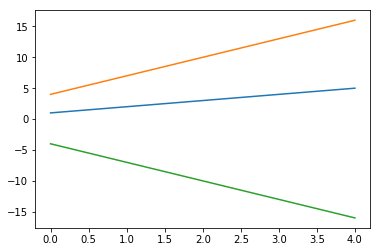

In [3]:
plt.plot( a )
plt.plot( b )
plt.plot( c )

<b>Всякие суммы</b>

In [4]:
a * b # Вспоминаем...по-элементвное произведение элементов

array([ 4, 14, 30, 52, 80])

In [5]:
np.sum( a * b ) # Сумма по-элементных произведений.

180

In [6]:
np.correlate( a, b) # Есть функция для этого.

array([180])

In [7]:
np.convolve(a, [1, 2]) # Свертка. С Граничным эффектом.
# [2,1] ползет вдоль a.
# 1) 1*1, 2) 2*1 + 1*2, 3) 2*2+ 1*3, 4) 2*3+1*4, 5) 2*4 + 1*5, 6) 2*5

array([ 1,  4,  7, 10, 13, 10])

In [8]:
conv = np.convolve(a, b[::-1]) # b в обратном порядке!
conv

array([ 16,  45,  84, 130, 180, 134,  90,  51,  20])

In [9]:
conv[4] # Соответсвует корреляции.

180

In [10]:
np.correlate(a, b[::-1], mode='valid') # Без граничных случаев.

array([120])

<b>Вспоминая курс статистики</b>

In [11]:
s = np.mean( a * b ) 
sa = np.mean( a ) 
sb = np.mean( b )
s, sa, sb

(36.0, 3.0, 10.0)

In [12]:
s - sa*sb # Ковариация

6.0

In [13]:
np.mean((a - sa)*(b - sb))

6.0

In [14]:
np.cov( np.array([a,b]), bias = True)

array([[ 2.,  6.],
       [ 6., 18.]])

In [15]:
np.cov( [a,b] )

array([[ 2.5,  7.5],
       [ 7.5, 22.5]])

<b>Нормирование</b>

In [16]:
np.corrcoef([a,b])

array([[1., 1.],
       [1., 1.]])

In [17]:
np.corrcoef([a,d])

array([[1.        , 0.96423417],
       [0.96423417, 1.        ]])

In [18]:
6/np.sqrt(2*18)

1.0

In [19]:
6/(np.sqrt(np.std(a)*np.std(b)))

2.4494897427831783

In [20]:
7.5/np.sqrt(2.5*22.5)

1.0

<h2>Именные</h2>

<b>Pearson</b>

In [21]:
models.pearsonr(a, b)

(1.0, 0.0)

In [22]:
models.pearsonr(a, c) #

(-1.0, 0.0)

In [23]:
aa = [1, 2, 1, 3, 1]
bb = [10, 12, 10, 14, 10]

In [24]:
models.pearsonr(aa, bb) # Необязательно монотонный данные.

(0.9999999999999999, 1.4042654220543602e-24)

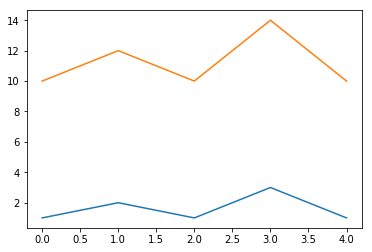

In [25]:
plt.plot( aa )
plt.plot( bb )

<b>Spearman</b>

In [26]:
a = [1,2,3,4,5]
b = [50,51,60,100,200]

In [27]:
models.pearsonr(a, b)

(0.8671831232207267, 0.05693333908865833)

In [28]:
dict(list( map( lambda x: x[::-1],list(enumerate(a)))))

{1: 0, 2: 1, 3: 2, 4: 3, 5: 4}

In [29]:
d=[(1,0),(5,1),(-5,2)]

In [30]:
d.sort()

In [31]:
d

[(-5, 2), (1, 0), (5, 1)]

In [32]:
models.rankdata(b)

array([1., 2., 3., 4., 5.])

In [33]:
models.spearmanr(a, b)

SpearmanrResult(correlation=0.9999999999999999, pvalue=1.4042654220543672e-24)

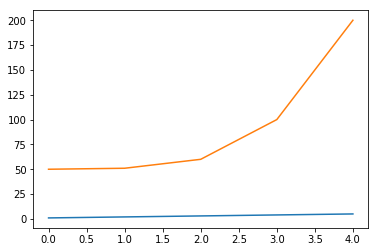

In [34]:
plt.plot( [1,2,3,4,5] )
plt.plot( [50,51,60,100,200] )

In [35]:
models.spearmanr([1,2,6,4,5], [50,51,300,100,200])

SpearmanrResult(correlation=0.9999999999999999, pvalue=1.4042654220543672e-24)

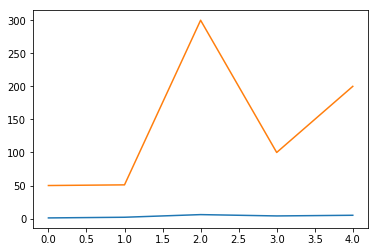

In [36]:
plt.plot( [1,2,6,4,5] )
plt.plot( [50,51,300,100,200] )

In [37]:
models.spearmanr([1,5,4,3,2], [5,6,7,8,7])

SpearmanrResult(correlation=0.20519567041703082, pvalue=0.7405819415910722)

<h2>критерий Шапиро-Уилка</h2>

In [38]:
N = 100000
dd = np.zeros((2*N, 6)) #3
for _ in range(N):
    d = np.random.randn(6)
    #e = d.copy()
    #e -= e.mean()
    ##d /= e.std()
    #d = e/e.std();
    d.sort()
    #t = d[3:] - d[:3][::-1]
    t = d
    dd[2*_] = t
    dd[2*_+1] = -t[::-1]
dd.shape

(200000, 6)

In [39]:
m = np.mean( dd, axis=0 )
m

array([-1.26656907, -0.6406201 , -0.20088626,  0.20088626,  0.6406201 ,
        1.26656907])

In [40]:
#q = (dd-m).T
#np.dot( q, q.T )/200000

In [41]:
V = np.cov( dd.T )
V

array([[0.41562678, 0.20837171, 0.13919597, 0.10303612, 0.07791938,
        0.05630047],
       [0.20837171, 0.27956928, 0.18912386, 0.14024041, 0.10646041,
        0.07791938],
       [0.13919597, 0.18912386, 0.24616476, 0.18340318, 0.14024041,
        0.10303612],
       [0.10303612, 0.14024041, 0.18340318, 0.24616476, 0.18912386,
        0.13919597],
       [0.07791938, 0.10646041, 0.14024041, 0.18912386, 0.27956928,
        0.20837171],
       [0.05630047, 0.07791938, 0.10303612, 0.13919597, 0.20837171,
        0.41562678]])

In [42]:
L = np.linalg.cholesky(V)
L

array([[0.64469123, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.32321165, 0.41845372, 0.        , 0.        , 0.        ,
        0.        ],
       [0.21591106, 0.28519018, 0.34382224, 0.        , 0.        ,
        0.        ],
       [0.15982243, 0.21169352, 0.25746688, 0.33093535, 0.        ,
        0.        ],
       [0.1208631 , 0.16105975, 0.19839343, 0.2557363 , 0.36641526,
        0.        ],
       [0.08732935, 0.11875511, 0.14633421, 0.1886256 , 0.27678976,
        0.51018791]])

In [43]:
L.dot(L.T)

array([[0.41562678, 0.20837171, 0.13919597, 0.10303612, 0.07791938,
        0.05630047],
       [0.20837171, 0.27956928, 0.18912386, 0.14024041, 0.10646041,
        0.07791938],
       [0.13919597, 0.18912386, 0.24616476, 0.18340318, 0.14024041,
        0.10303612],
       [0.10303612, 0.14024041, 0.18340318, 0.24616476, 0.18912386,
        0.13919597],
       [0.07791938, 0.10646041, 0.14024041, 0.18912386, 0.27956928,
        0.20837171],
       [0.05630047, 0.07791938, 0.10303612, 0.13919597, 0.20837171,
        0.41562678]])

In [44]:
Linv = np.linalg.inv(L)
ddd = Linv.dot( dd.T )
#ddd.shape

In [45]:
Vinv = np.linalg.inv(V)
Vinv

array([[ 3.84184361e+00, -2.90212521e+00,  5.29067255e-02,
        -1.52112923e-04,  4.86770901e-05,  1.05718141e-02],
       [-2.90212521e+00,  9.64048975e+00, -5.79571831e+00,
         1.24363629e-02,  3.66029581e-02,  4.86770901e-05],
       [ 5.29067255e-02, -5.79571831e+00,  1.35794927e+01,
        -6.84708251e+00,  1.24363629e-02, -1.52112923e-04],
       [-1.52112923e-04,  1.24363629e-02, -6.84708251e+00,
         1.35794927e+01, -5.79571831e+00,  5.29067255e-02],
       [ 4.86770901e-05,  3.66029581e-02,  1.24363629e-02,
        -5.79571831e+00,  9.64048975e+00, -2.90212521e+00],
       [ 1.05718141e-02,  4.86770901e-05, -1.52112923e-04,
         5.29067255e-02, -2.90212521e+00,  3.84184361e+00]])

In [46]:
np.cov(ddd)

array([[ 1.00000000e+00, -4.84881228e-16, -3.33867937e-16,
        -3.22037342e-16,  7.45487402e-16, -6.93315541e-17],
       [-4.84881228e-16,  1.00000000e+00,  1.12130866e-16,
         7.53711976e-17, -1.18718518e-15,  7.43764327e-16],
       [-3.33867937e-16,  1.12130866e-16,  1.00000000e+00,
         4.11011948e-15, -1.56319517e-15, -1.27274828e-15],
       [-3.22037342e-16,  7.53711976e-17,  4.11011948e-15,
         1.00000000e+00,  3.64391229e-15, -5.84122340e-16],
       [ 7.45487402e-16, -1.18718518e-15, -1.56319517e-15,
         3.64391229e-15,  1.00000000e+00,  1.84502226e-16],
       [-6.93315541e-17,  7.43764327e-16, -1.27274828e-15,
        -5.84122340e-16,  1.84502226e-16,  1.00000000e+00]])

In [47]:
#m.mean(), m.std()
m /= m.std()

In [48]:
Linv.T.dot(Linv.dot(m))

array([-3.62965884, -1.58265224, -0.54347574,  0.54347574,  1.58265224,
        3.62965884])

In [49]:
m.dot(Vinv)

array([-3.62965884, -1.58265224, -0.54347574,  0.54347574,  1.58265224,
        3.62965884])

In [50]:
aa11 = Vinv.dot(m) #m.dot(Vinv)
aa11

array([-3.62965884, -1.58265224, -0.54347574,  0.54347574,  1.58265224,
        3.62965884])

In [51]:
np.sqrt(np.sum(aa11*aa11))/aa11.std()

2.4494897427831783

In [52]:
#k = np.sqrt(np.sum(a*a))
#k
aa11.mean(), aa11.std()

(2.220446049250313e-16, 2.307565621605544)

In [53]:
aa = aa11.copy()/np.sqrt(np.sum(aa11*aa11))
aa

array([-0.64214946, -0.27999857, -0.09615026,  0.09615026,  0.27999857,
        0.64214946])

In [54]:
np.sum(aa*aa)

1.0

In [55]:
#qa.mean(), qa.std()
aa.mean(), aa.std(), np.sqrt(np.sum(aa*aa))

(1.850371707708594e-17, 0.408248290463863, 1.0)

In [56]:
qa = dd[136].copy()
qa -= qa.mean()
qa /= qa.std()*np.sqrt(6)
np.sum( aa * qa )**2

0.9138825944112277

In [57]:
np.sum( aa * qa )/np.sqrt(np.sum(aa*aa))

0.9559720677986505

In [58]:
np.sum( aa * qa )/( np.sqrt(np.sum(qa*qa)) * np.sqrt(np.sum(aa*aa)) )

0.9559720677986505

In [59]:
np.sum(qa*qa)
#mm = Linv.dot(qa)
#mm.std()/qa.std()
#mm = Linv.dot(m)
#mm.std()/m.std()

1.0000000000000002

In [60]:
p = Linv.dot(qa) #qa#ddd.T[66]
#qa.mean()
p.mean(), p.std(), np.sqrt(np.sum(p*p))

(0.19806791237437074, 0.6972815221560421, 1.775554706089207)

In [61]:
mm = Linv.dot( m )
#m.mean()
#mm -= mm.mean()
#mm /= mm.std()
#mm
mm.mean(), mm.std(), np.sqrt(np.sum(aa11*aa11))

(0.5189631695054681, 1.4263711012912206, 5.652358320921868)

In [62]:
np.std(aa11)/1.424999146
#np.sqrt(np.sum(mm*mm))

1.6193452663343166

In [63]:
np.sum( mm * p )/np.sqrt(np.sum(aa11*aa11))

0.9559720677986506

In [64]:
#np.sum( mm * p )/(np.sqrt(np.sum(aa11*aa11)) * np.sqrt(np.sum(qa*qa)) )

In [65]:
#np.sqrt(np.sum(qa*qa)) * np.sqrt(np.sum(aa*aa)), np.sqrt(np.sum(mm*mm)) * np.sqrt(np.sum(p*p)), np.std(qa) * np.std(aa)

In [66]:
qs = []
for ii in dd:
    qa = ii.copy()
    qa -= qa.mean()
    s = np.sum( aa * qa )/np.sqrt(np.sum(qa*qa))
    qs.append(s**2)

In [67]:
qs.sort()

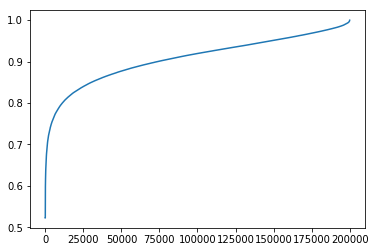

In [68]:
plt.plot(qs)

In [69]:
qs[int(len(qs)*0.5)]

0.919345621828616

In [70]:
qs[int(len(qs)*0.02)]

0.7498347853982748

<b>Проверка</b>

In [71]:
aa

array([-0.64214946, -0.27999857, -0.09615026,  0.09615026,  0.27999857,
        0.64214946])

In [72]:
ddв = np.random.randn(6)

In [73]:
ee = ddd.copy()
ee -= ee.mean()
ee.sort()
(np.sum( aa * ee )/np.sqrt(np.sum(ee*ee)))**2

ValueError: operands could not be broadcast together with shapes (6,) (6,200000) 

In [ ]:
models.shapiro( ddd ) # Есть готовая функция.

In [74]:
ddd = np.array([0., 0., 0., 1., -2., 2.])
ee = ddd.copy()
ee -= ee.mean()
ee.sort()
(np.sum( aa * ee )/np.sqrt(np.sum(ee*ee)))**2

0.9186228099939187

In [75]:
models.shapiro( dd[136] )

(0.9090523719787598, 0.4301914870738983)